# Enhanced User interface

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Plotting parameters
plt.rcParams['figure.figsize'] = [12.0, 6.0]
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['font.size'] = 15
plt.style.use('seaborn-colorblind')
yplevs = np.array([10,30,70,125,175,225,300,400,500,700,925])*100.

In [3]:
#
# Make sure you have Python 3
#
from platform import python_version
if python_version()[0] != '3':
    print("Your Version:", python_version())
    raise RuntimeError("This Notebook requires Python 3")

In [4]:
sys.path.append('code/')
import cds_eua3 as eua

## CDM Classes

* CDMVariable - Low Level Variable that allows access to the data
* CDMGroup - Just a wrapper from CDMVariable to accommodate Groups
* CDMDataset - Main Class with all CDM Functions

### CDM Variable

In [5]:
# CDM Variable Routines
print("\n".join(['CDMVariable.{:20} - {}'.format(i+'()', getattr(eua.CDMVariable,i).__doc__.split('\n')[0]) for i in dir(eua.CDMVariable) if '__' not in i]))

CDMVariable.isArray()            -  Loaded to Memory?
CDMVariable.keys()               -  list of Attributes
CDMVariable.update()             -  Update HDF5 File Reference, Link


### CDM Dataset

In [6]:
# CDM Dataset Routines
print("\n".join(['CDMDataset.{:30} - {}'.format(i+'()', getattr(eua.CDMDataset,i).__doc__.split('\n')[0]) for i in dir(eua.CDMDataset) if '__' not in i]))

CDMDataset.availability()                 -  Read datetime and check how much data is available
CDMDataset.check_cdm_duplicates()         -  Run a duplication check on a group and some variables
CDMDataset.close()                        -  Close H5py file
CDMDataset.inquire()                      -  Read HDF5 file structures
CDMDataset.load_variable_from_file()      -  Allow to load a variable from a group
CDMDataset.make_datetime_slice()          -  Create a datetime slice for HDF5 optimal reading
CDMDataset.profile_to_dataframe()         -  Convert HDF5 variables to a DataFrame
CDMDataset.read_attributes()              -  Return all attributes or a subset for a variable
CDMDataset.read_data_to_cube()            -  Read standard pressure levels and return a DataCube
CDMDataset.read_observed_variable()       -  Read a variable from a CDM backend file
CDMDataset.read_variable()                -  Read a variable from a CDM frontend file
CDMDataset.read_write_request()           -  This i

### EUA Function

In [7]:
for i in dir(eua):
    if '__' in i:
        continue
    if i in ['njit', 'datetime', 'timedelta', 'CDMDataset', 'CDMVariable', 'CDMGroup']:
        continue
    try:
        j = getattr(eua, i)
        if hasattr(j, '__call__'):
            print('eua.{:30} - {}'.format(i+'()', j.__doc__.split('\n')[0]))
    except:
        pass

eua._count_data()                  -  Helper for align_datetime
eua.align_datetime()               -  Standardize datetime to times per date, try to fill gaps
eua.andisin()                      -  numba version of numpy.in1d(x, v)
eua.andisin_t()                    -  numba version of numpy.in1d, for times
eua.calc_trajindexfast()           -  Calculate Trajectory Index 
eua.cdm_to_cds()                   -  CDM Name to CDS Name
eua.cds_to_cdm()                   -  CDS Name to CDM Name
eua.convert_datetime()             -  input date (str,int,...) to datetime64 or formatted string
eua.datetime_to_seconds()          -  from datetime64 to seconds since 1900-01-01 00:00:00
eua.do_cfcopy()                    -  Copy H5PY variables and apply subsetting (idx)
eua.get_attributes()               -  Get attributes from CF Table for a code
eua.is_sorted()                    -  check if an array is sorted
eua.last_day_of_month()            -  last day of a month
eua.level_interpolation()        

# Backend Files

1. Reading a CDM Backend file with a given `path`
2. Using Groups and Variables
3. Loading Variables and Acessing Data
4. Reading Attributes

In [5]:
if False:
    # old file with duplicates and not sorted
    data = eua.CDMDataset('/raid60/scratch/federico/JUNE_TEST_MERGING_ALL/0-20000-0-01001_CEUAS_merged_v0.nc')
    
data = eua.CDMDataset('/raid60/scratch/federico/JULY_MERGE/0-20000-0-10962_CEUAS_merged_v0.nc')

2020-08-14 17:19:38,979 - upperair.cdm | __init__ - DEBUG - [OPEN] /raid60/scratch/federico/JULY_MERGE/0-20000-0-10962_CEUAS_merged_v0.nc


## Dataset Attributes

In [9]:
# h5py File Reference, until data.close(), the file is opened
data.file

<HDF5 file "0-20000-0-10962_CEUAS_merged_v0.nc" (mode r)>

In [10]:
# Close the HDF file
data.close()

2020-08-14 16:41:22,470 - upperair.cdm | close - DEBUG - [CLOSED] /raid60/scratch/federico/JULY_MERGE/0-20000-0-10962_CEUAS_merged_v0.nc


In [11]:
# Reopen it, potentially with different mode
data.reopen(mode='r')

2020-08-14 16:41:23,009 - upperair.cdm | reopen - DEBUG - reopen /raid60/scratch/federico/JULY_MERGE/0-20000-0-10962_CEUAS_merged_v0.nc [r]


In [12]:
# Note due to access rights, the file was copied to a tmp directory and opened for writing
data.reopen(mode='r+')

2020-08-14 16:41:24,035 - upperair.cdm | reopen - WARNING - reopen [r+] Copy file to /raid8/srvx1/mblaschek/tmp/0-20000-0-10962_CEUAS_merged_v0.nc
2020-08-14 16:41:24,036 - upperair.cdm | reopen - DEBUG - reopen /raid8/srvx1/mblaschek/tmp/0-20000-0-10962_CEUAS_merged_v0.nc [r+]


In [13]:
data.close() # Close again and read original again
data = eua.CDMDataset('/raid60/scratch/federico/JULY_MERGE/0-20000-0-10962_CEUAS_merged_v0.nc')

2020-08-14 16:41:24,091 - upperair.cdm | close - DEBUG - [CLOSED] /raid8/srvx1/mblaschek/tmp/0-20000-0-10962_CEUAS_merged_v0.nc
2020-08-14 16:41:24,091 - upperair.cdm | __init__ - DEBUG - [OPEN] /raid60/scratch/federico/JULY_MERGE/0-20000-0-10962_CEUAS_merged_v0.nc


In [14]:
data.filename

'/raid60/scratch/federico/JULY_MERGE/0-20000-0-10962_CEUAS_merged_v0.nc'

In [15]:
data.hasgroups

True

In [16]:
data.name

'0-20000-0-10962_CEUAS_merged_v0.nc'

## Groups and Variables are shown.
- G for Groups, Number indicates Variables in Group
- V for Variables, Number indicates Shape of Variable

In [17]:
# h5Py file structure (Groups and variables) shapes and number of variables in groups
data

Filename: /raid60/scratch/federico/JULY_MERGE/0-20000-0-10962_CEUAS_merged_v0.nc
(G)roups/(V)ariables: 

 - G | crs__________________________________________ : : 4
 - V | dateindex____________________________________ : : (4155,)
 - G | era5fb_______________________________________ : : 72
 - G | header_table_________________________________ : : 53
 - G | observations_table___________________________ : : 49
 - G | observed_variable____________________________ : : 9
 - V | recordindex__________________________________ : : (7314,)
 - V | recordtimestamp______________________________ : : (7314,)
 - G | source_configuration_________________________ : : 2
 - G | station_configuration_codes__________________ : : 7
 - G | station_type_________________________________ : : 4
 - G | units________________________________________ : : 6
 - G | z_coordinate_type____________________________ : : 4

In [18]:
# Groups are attached to the Class and can be accesed like this
data.observations_table

observations_table:

adjustment_id_____________________________________ : : (18702774,)
advanced_assimilation_feedback____________________ : : (18702774,)
advanced_homogenisation___________________________ : : (18702774,)
advanced_qc_______________________________________ : : (18702774,)
advanced_uncertainty______________________________ : : (18702774,)
bbox_max_latitude_________________________________ : : (18702774,)
bbox_max_longitude________________________________ : : (18702774,)
bbox_min_latitude_________________________________ : : (18702774,)
bbox_min_longitude________________________________ : : (18702774,)
code_table________________________________________ : : (18702774,)
conversion_flag___________________________________ : : (18702774,)
conversion_method_________________________________ : : (18702774,)
crs_______________________________________________ : : (18702774,)
data_policy_licence_______________________________ : : (18702774,)
date_time________________________________

In [19]:
# or by getitem
data['observations_table']

observations_table:

adjustment_id_____________________________________ : : (18702774,)
advanced_assimilation_feedback____________________ : : (18702774,)
advanced_homogenisation___________________________ : : (18702774,)
advanced_qc_______________________________________ : : (18702774,)
advanced_uncertainty______________________________ : : (18702774,)
bbox_max_latitude_________________________________ : : (18702774,)
bbox_max_longitude________________________________ : : (18702774,)
bbox_min_latitude_________________________________ : : (18702774,)
bbox_min_longitude________________________________ : : (18702774,)
code_table________________________________________ : : (18702774,)
conversion_flag___________________________________ : : (18702774,)
conversion_method_________________________________ : : (18702774,)
crs_______________________________________________ : : (18702774,)
data_policy_licence_______________________________ : : (18702774,)
date_time________________________________

In [20]:
# Variables in Groups can be accessed like this
data.observations_table.date_time

date_time : (18702774,)

In [21]:
# or like this
data['observations_table']['date_time']

date_time : (18702774,)

In [22]:
# common functions are isArray and keys()
print('isArray() ?', data.observations_table.date_time.isArray())
print('keys() ?', data.observations_table.date_time.keys())

isArray() ? False
keys() ? ['shape']


In [23]:
# Another Attribute that is there all the time is shape
data.observations_table.date_time.shape

(18702774,)

In [24]:
# The Link points to the HDF file
data.observations_table.date_time.link

<HDF5 dataset "date_time": shape (18702774,), type "<i8">

In [25]:
# This hidden value points to the data (when loaded) or to the link 
data.observations_table.date_time._data

<HDF5 dataset "date_time": shape (18702774,), type "<i8">

### Access the HDF Data

In [26]:
# Access the HDF Data
data.observations_table.date_time[slice(None)]  # or with indices, A slice is always faster due to HDF5 implementation

if False:
    data.observations_table.date_time[()]  # as slice(None)

# Please note accessing data like this does not mean it is loaded into memory and sorted in the class

In [27]:
# datetime is not loaded
data.observations_table

observations_table:

adjustment_id_____________________________________ : : (18702774,)
advanced_assimilation_feedback____________________ : : (18702774,)
advanced_homogenisation___________________________ : : (18702774,)
advanced_qc_______________________________________ : : (18702774,)
advanced_uncertainty______________________________ : : (18702774,)
bbox_max_latitude_________________________________ : : (18702774,)
bbox_max_longitude________________________________ : : (18702774,)
bbox_min_latitude_________________________________ : : (18702774,)
bbox_min_longitude________________________________ : : (18702774,)
code_table________________________________________ : : (18702774,)
conversion_flag___________________________________ : : (18702774,)
conversion_method_________________________________ : : (18702774,)
crs_______________________________________________ : : (18702774,)
data_policy_licence_______________________________ : : (18702774,)
date_time________________________________

### This loads the variable and replaces the _origin with the numpy array

In [28]:
data.load_variable_from_file('date_time', group='observations_table')

In [29]:
# Now date_time is loaded
data.observations_table

observations_table:

adjustment_id_____________________________________ : : (18702774,)
advanced_assimilation_feedback____________________ : : (18702774,)
advanced_homogenisation___________________________ : : (18702774,)
advanced_qc_______________________________________ : : (18702774,)
advanced_uncertainty______________________________ : : (18702774,)
bbox_max_latitude_________________________________ : : (18702774,)
bbox_max_longitude________________________________ : : (18702774,)
bbox_min_latitude_________________________________ : : (18702774,)
bbox_min_longitude________________________________ : : (18702774,)
code_table________________________________________ : : (18702774,)
conversion_flag___________________________________ : : (18702774,)
conversion_method_________________________________ : : (18702774,)
crs_______________________________________________ : : (18702774,)
data_policy_licence_______________________________ : : (18702774,)
date_time________________________________

In [30]:
# Now isArray is True as the data is loaded
data.observations_table.date_time.isArray()

True

In [31]:
# Access still workds the same way, for consistency
data.observations_table.date_time[()]

array([2552299200, 2552299200, 2552299200, ..., 3786673592, 3786673592,
       3786673592])

In [32]:
# HDF Attributes can be retrieved from every Variable
data.read_attributes('date_time', group='observations_table')

{'description': 'timestamp for observation',
 'external_table': 'nan',
 'units': 'seconds since 1900-01-01 00:00:00'}

## CDM Check duplicates

This is the typical function we used before for checking if duplicates in date_time and z_coordinate exist.

In [33]:
print(data.check_cdm_duplicates('observations_table', 
                          ['observation_value', 'date_time', 'z_coordinate', 'observed_variable', 'source_id', 'z_coordinate_type']
                         ))

2020-08-14 16:42:11,656 - upperair.cdm | profile_to_dataframe - INFO - Reading Profile on slice(None, None, None)
2020-08-14 16:42:13,545 - upperair.cdm | profile_to_dataframe - DEBUG - Read variables: dict_keys(['observation_value', 'date_time', 'z_coordinate', 'observed_variable', 'source_id', 'z_coordinate_type'])
2020-08-14 16:42:25,013 - upperair.cdm | check_cdm_duplicates - INFO - Evaluating for duplicates ... (pandas)
Empty DataFrame
Columns: [observation_value, date_time, z_coordinate, observed_variable, source_id, z_coordinate_type]
Index: []


## Availability of data

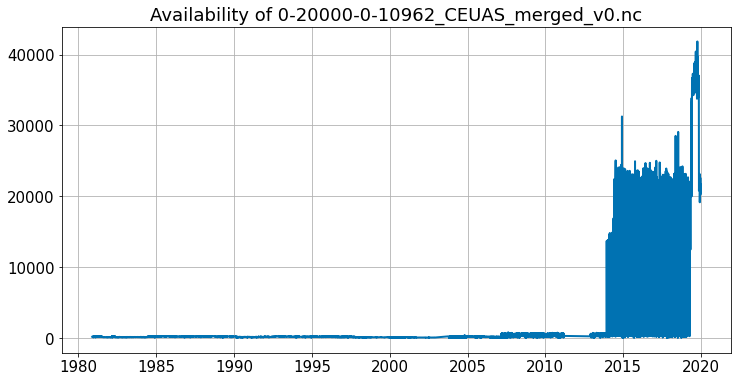

In [34]:
plot(data.availability())
grid()
title('Availability of {}'.format(data.name));

## Convert to DataFrame

this function is meant to check some data directly, on specific dates or indices

* Select Groups, e.g. observations_table, era5fb
* select Variable names, e.g. observation_value, ...
* select date as string or as index (using date_is_index=True), can be a range too

In [35]:
print(
    data.profile_to_dataframe('observations_table', 
                              ['observation_value', 'date_time', 'z_coordinate', 'observed_variable', 'report_id'], 
                              '2016-06-01',
                              date_is_index=False)
     )

2020-08-14 16:42:56,629 - upperair.cdm | make_datetime_slice - DEBUG - Datetime selection: 7738303 - 7759812
2020-08-14 16:42:56,630 - upperair.cdm | profile_to_dataframe - INFO - Reading Profile on slice(7738303, 7759812, None)
2020-08-14 16:42:56,638 - upperair.cdm | profile_to_dataframe - DEBUG - Read variables: dict_keys(['observation_value', 'date_time', 'z_coordinate', 'observed_variable', 'report_id'])
       observation_value   date_time  z_coordinate  observed_variable  \
0             106.000000  3673746229         490.0                106   
1              10.000000  3673746229         490.0                107   
2              -9.612617  3673746229         490.0                104   
3               2.756374  3673746229         490.0                105   
4          356118.687500  3673746229         490.0                117   
...                  ...         ...           ...                ...   
21504         280.000000  3673749600       89900.0                106   
215

## Read Observed Variable

In the Backend files the variables are currently (2020-08) written in a ragged form.
That's why we need to subset.
This function is used in the requests from the CDS as well.
The functionality is build from `cds_eua2.process_flat`

* CDM Code
* Date time selection
* Pressure levels or None (all)
* convert to Xarray ?

The Resulting Variable can be a list of 

In [36]:
%%time 
data.read_observed_variable(85, 
                            dates = ['2000-01-01', '2019-12-31'], 
                            plevs = eua.std_plevs*100, 
                            times = None
                           )
# Return just the numpy array

2020-08-14 16:43:11,392 - upperair.cdm | make_datetime_slice - DEBUG - Datetime selection: 403943 - 18702774
2020-08-14 16:43:11,694 - upperair.cdm | read_observed_variable - INFO - [READ] Observed variable 85
2020-08-14 16:43:12,337 - upperair.cdm | read_observed_variable - INFO - [READ] pressure levels [  1000   2000   3000   5000   7000  10000  15000  20000  25000  30000
  40000  50000  70000  85000  92500 100000]
CPU times: user 1.13 s, sys: 343 ms, total: 1.48 s
Wall time: 1.44 s


array([213.3 , 210.7 , 211.5 , ..., 257.75, 269.04, 278.37], dtype=float32)

In [37]:
%%time 
data.read_observed_variable(85, 
                            dates = ['2000-01-01', '2019-12-31'], 
                            plevs = eua.std_plevs*100, 
                            times = None,
                            return_index = True
                           )
# Return a time slice and mask. This is used in the CDS requests

2020-08-14 16:43:16,910 - upperair.cdm | make_datetime_slice - DEBUG - Datetime selection: 403943 - 18702774
2020-08-14 16:43:17,198 - upperair.cdm | read_observed_variable - INFO - [READ] Observed variable 85
2020-08-14 16:43:17,430 - upperair.cdm | read_observed_variable - INFO - [READ] pressure levels [  1000   2000   3000   5000   7000  10000  15000  20000  25000  30000
  40000  50000  70000  85000  92500 100000]
CPU times: user 429 ms, sys: 142 ms, total: 571 ms
Wall time: 530 ms


(slice(403943, 18702774, None),
 array([False, False, False, ..., False, False, False]))

In [38]:
%%time 
data.read_observed_variable(85, 
                            dates = ['2000-01-01', '2019-12-31'], 
                            plevs = eua.std_plevs*100, 
                            times = None,
                            return_index = True,
                            return_coordinates = True,
                           )
# Return a time slice, a mask, dates (mask applied) and pressures (mask applied)

2020-08-14 16:43:20,954 - upperair.cdm | make_datetime_slice - DEBUG - Datetime selection: 403943 - 18702774
2020-08-14 16:43:21,249 - upperair.cdm | read_observed_variable - INFO - [READ] Observed variable 85
2020-08-14 16:43:21,480 - upperair.cdm | read_observed_variable - INFO - [READ] pressure levels [  1000   2000   3000   5000   7000  10000  15000  20000  25000  30000
  40000  50000  70000  85000  92500 100000]
CPU times: user 416 ms, sys: 170 ms, total: 586 ms
Wall time: 547 ms


(slice(403943, 18702774, None),
 array([False, False, False, ..., False, False, False]),
 array([3155886000, 3155886000, 3155886000, ..., 3786673592, 3786673592,
        3786673592]),
 array([ 7000., 10000., 15000., ..., 50000., 70000., 85000.], dtype=float32))

In [39]:
%%time 
temp = data.read_observed_variable(85, 
                                   dates = ['2000-01-01', '2019-12-31'], 
                                   plevs = eua.std_plevs*100, 
                                   times = None,                                 
                                   return_coordinates = False,
                                   return_index = False,
                                   return_xarray = True)
# return an DataArray

2020-08-14 16:43:23,991 - upperair.cdm | make_datetime_slice - DEBUG - Datetime selection: 403943 - 18702774
2020-08-14 16:43:24,288 - upperair.cdm | read_observed_variable - INFO - [READ] Observed variable 85
2020-08-14 16:43:24,520 - upperair.cdm | read_observed_variable - INFO - [READ] pressure levels [  1000   2000   3000   5000   7000  10000  15000  20000  25000  30000
  40000  50000  70000  85000  92500 100000]
2020-08-14 16:43:25,004 - upperair.cdm | read_observed_variable - INFO - [READ] xarray ... (68709,)
2020-08-14 16:43:25,016 - upperair.cdm | read_observed_variable - DEBUG - [READ] datetime conversion 68709
CPU times: user 875 ms, sys: 214 ms, total: 1.09 s
Wall time: 1.05 s


In [40]:
%%time 
temp = data.read_observed_variable(85, 
                                   dates = ['2000-01-01', '2019-12-31'], 
                                   plevs = eua.std_plevs*100, 
                                   times = [0, 12],                                 
                                   return_coordinates = False,
                                   return_index = False,
                                   return_xarray = True)
# return an DataArray

2020-08-14 16:43:32,643 - upperair.cdm | make_datetime_slice - DEBUG - Datetime selection: 403943 - 18702774
2020-08-14 16:43:32,932 - upperair.cdm | read_observed_variable - INFO - [READ] Observed variable 85
2020-08-14 16:43:33,162 - upperair.cdm | read_observed_variable - INFO - [READ] pressure levels [  1000   2000   3000   5000   7000  10000  15000  20000  25000  30000
  40000  50000  70000  85000  92500 100000]
2020-08-14 16:43:34,443 - upperair.cdm | read_observed_variable - INFO - [READ] xarray ... (496,)
2020-08-14 16:43:34,449 - upperair.cdm | read_observed_variable - DEBUG - [READ] datetime conversion 496
CPU times: user 1.28 s, sys: 611 ms, total: 1.89 s
Wall time: 1.85 s


In [41]:
# only 0 or 12
print(temp.date_time.dt.hour)

<xarray.DataArray 'hour' (obs: 496)>
array([12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, 12, 12, 12, 12, 12, 12, 

### Add CF Attributes

In [42]:
temp.attrs.update(*eua.get_attributes(cdmname='temperature').values())

In [43]:
print(temp)

<xarray.DataArray (obs: 496)>
array([209.05, 213.25, 210.65, 211.45, 208.05, 214.05, 222.85, 238.45,
       252.25, 268.45, 277.35, 222.45, 205.05, 199.85, 203.85, 204.65,
       210.25, 207.45, 214.25, 211.65, 220.45, 233.25, 244.65, 255.05,
       266.05, 212.45, 213.85, 211.65, 214.45, 225.05, 240.85, 253.25,
       270.65, 278.75, 194.3 , 198.7 , 203.5 , 210.1 , 205.9 , 212.3 ,
       221.1 , 237.7 , 248.3 , 265.1 , 273.4 , 216.85, 213.25, 215.65,
       213.25, 211.45, 210.45, 216.45, 226.25, 222.45, 224.65, 237.65,
       249.85, 267.65, 276.75, 209.65, 212.45, 210.25, 212.45, 213.65,
       213.85, 217.45, 213.65, 216.85, 226.45, 237.65, 250.65, 268.25,
       274.75, 222.65, 211.05, 212.05, 213.65, 213.65, 211.45, 216.85,
       209.65, 212.45, 223.25, 237.25, 250.25, 263.45, 273.55, 211.9 ,
       211.7 , 210.9 , 212.1 , 213.5 , 217.1 , 224.9 , 229.5 , 227.1 ,
       223.9 , 232.3 , 245.7 , 263.9 , 275.8 , 207.9 , 212.7 , 211.5 ,
       211.5 , 213.1 , 215.9 , 221.1 , 225.9 , 

## HUG Webserver Request

In [44]:
cftable = eua.read_standardnames()

In [45]:
# Typical request that is forwarded from CDS
data.read_write_request('test.nc', 
                        {'variable': ['temperature'], 
                         'date':['2000-01-01', '2019-12-31'], 
                         'pressure_levels': [50000, 85000]
                        }, 
                        cftable)

2020-08-14 16:44:03,416 - upperair.cdm | make_datetime_slice - DEBUG - Datetime selection: 403943 - 18702774
2020-08-14 16:44:03,700 - upperair.cdm | read_observed_variable - INFO - [READ] Observed variable 85
2020-08-14 16:44:03,900 - upperair.cdm | read_observed_variable - INFO - [READ] pressure levels [50000, 85000]
2020-08-14 16:44:03,907 - upperair.cdm | read_write_request - DEBUG - Datetime selection: 403943 - 18702774 [ 0.49 s] 0-20000-0-10962_CEUAS_merged_v0.nc
2020-08-14 16:44:03,912 - upperair.cdm | read_write_request - DEBUG - Data found: 10123 0-20000-0-10962_CEUAS_merged_v0.nc
2020-08-14 16:44:03,916 - upperair.cdm | read_write_request - DEBUG - Request-keys: dict_keys(['variable', 'date', 'pressure_levels'])
2020-08-14 16:44:03,916 - upperair.cdm | read_write_request - DEBUG - Writing: test.nc
2020-08-14 16:44:05,149 - upperair.cdm | do_cfcopy - WARNING - slow copy: observations_table 1.229170 s
2020-08-14 16:44:05,156 - upperair.cdm | read_write_request - DEBUG - Group o

In [46]:
with eua.CDMDataset('test.nc') as new:
    print(new)
    print('#'*80)
    print(new.read_data_to_cube('ta'))

2020-08-14 16:44:07,053 - upperair.cdm | __init__ - DEBUG - [OPEN] test.nc
Filename: test.nc
(G)roups/(V)ariables: 

 - V | lat__________________________________________ : : (10123,)
 - V | lon__________________________________________ : : (10123,)
 - V | obs__________________________________________ : : (10123,)
 - V | plev_________________________________________ : : (10123,)
 - V | string14_____________________________________ : : (14,)
 - V | ta___________________________________________ : : (10123,)
 - V | time_________________________________________ : : (10123,)
 - V | trajectory___________________________________ : : (5067,)
 - V | trajectory_index_____________________________ : : (10123,)
 - V | trajectory_label_____________________________ : : (5067, 14)
################################################################################
2020-08-14 16:44:07,061 - upperair.cdm | make_datetime_slice - DEBUG - Datetime selection: 0 - 10123
2020-08-14 16:44:07,064 - upperair.cdm | re

In [48]:
# Read with Xarray
import xarray as xr
print(xr.open_dataset('test.nc'))

<xarray.Dataset>
Dimensions:           (obs: 10123, string14: 14, trajectory: 5067)
Coordinates:
    lat               (obs) float32 ...
    lon               (obs) float32 ...
  * obs               (obs) int32 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    plev              (obs) float32 ...
  * string14          (string14) |S1 b'' b'' b'' b'' b'' ... b'' b'' b'' b'' b''
    time              (obs) datetime64[ns] ...
  * trajectory        (trajectory) int32 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0
Data variables:
    ta                (obs) float32 ...
    trajectory_index  (obs) int32 ...
    trajectory_label  (trajectory, string14) |S1 ...
Attributes:
    Conventions:  CF-1.7
    source:       radiosonde
    featureType:  trajectory
    history:      Created by Copernicus Early Upper Air Service Version 0, 14...
    license:      https://apps.ecmwf.int/datasets/licences/copernicus/


## Write data to observed variable

* Create a new group `adjust`
* Add Variable `adjusted_value` to this group
* The new variable is aligned with `observed_variable==85`, temperature

In [49]:
xyz = data.read_observed_variable(85, return_xarray=True)

2020-08-14 16:44:37,025 - upperair.cdm | make_datetime_slice - DEBUG - Datetime selection: 0 - 18702774
2020-08-14 16:44:37,315 - upperair.cdm | read_observed_variable - INFO - [READ] Observed variable 85
2020-08-14 16:44:38,014 - upperair.cdm | read_observed_variable - INFO - [READ] xarray ... (2166471,)
2020-08-14 16:44:38,115 - upperair.cdm | read_observed_variable - DEBUG - [READ] datetime conversion 2166471


In [50]:
print(xyz)

<xarray.DataArray (obs: 2166471)>
array([215.3 , 212.7 , 209.1 , ..., 277.5 , 277.34, 277.2 ], dtype=float32)
Coordinates:
  * obs           (obs) MultiIndex
  - date_time     (obs) datetime64[ns] 1980-11-17T12:00:00 ... 2019-12-30T05:...
  - z_coordinate  (obs) float64 840.0 1e+03 1.29e+03 ... 9.17e+04 9.181e+04


In [51]:
help(data.write_observed_data)

Help on method write_observed_data in module cds_eua3:

write_observed_data(name: str, varnum: int, cube: xarray.core.dataarray.DataArray = None, ragged=None, group: str = None, variable: str = 'observation_value', dimgroup: str = 'observations_table', data_time: str = 'time', data_plevs: str = 'plev', force_replace: bool = False, attributes: dict = None, interpolate: bool = False, interpolate_datetime: bool = False, extrapolate_time: bool = True, extrapolate_plevs: bool = False, **kwargs) method of cds_eua3.CDMDataset instance
    Write a DataCube or a Table (DataArray, DataFrame) with Multiindex to CDMBackend file
    
    Args:
        name: name of variable to write to
        cube: Cube input data
        ragged: Table input data
        varnum: observed variable CDM Code
        group: new Group
        variable: Variable Name
        dimgroup: Variable group
        data_time: time dimension input name
        data_plevs: pressure dimension input name
        force_replace: over

In [53]:
# We can write a DataCube or a Ragged Array to the file
data.write_observed_data('adjusted_value',
                         ragged=xyz,  # input data
                         varnum=85,  # observed_variable to be aligned with
                         group='adjust',   # name of the new group
                         data_time='date_time',  # named datetime coordinate
                         data_plevs='z_coordinate'  # named pressure coordinate
                        )

2020-08-14 16:45:53,054 - upperair.cdm | reopen - WARNING - reopen [r+] Copy file to /raid8/srvx1/mblaschek/tmp/0-20000-0-10962_CEUAS_merged_v0.nc
2020-08-14 16:45:53,055 - upperair.cdm | reopen - DEBUG - reopen /raid8/srvx1/mblaschek/tmp/0-20000-0-10962_CEUAS_merged_v0.nc [r+]
2020-08-14 16:45:53,101 - upperair.cdm | make_datetime_slice - DEBUG - Datetime selection: 0 - 18702774
2020-08-14 16:45:53,117 - upperair.cdm | read_observed_variable - INFO - [READ] Observed variable 85
2020-08-14 16:45:57,270 - upperair.cdm | write_observed_data - INFO - All dates found
2020-08-14 16:45:57,314 - upperair.cdm | write_observed_data - INFO - Creating Dataset adjusted_value (observations_table/observation_value, (18702774,))
2020-08-14 16:45:57,984 - upperair.cdm | write_observed_data - INFO - Finsihed writing adjusted_value to 0-20000-0-10962_CEUAS_merged_v0.nc


In [54]:
data

Filename: /raid8/srvx1/mblaschek/tmp/0-20000-0-10962_CEUAS_merged_v0.nc
(G)roups/(V)ariables: 

 - G | crs__________________________________________ : : 6
 - V | dateindex____________________________________ : : (4155,)
 - G | era5fb_______________________________________ : : 74
 - G | header_table_________________________________ : : 55
 - G | observations_table___________________________ : : 51
 - G | observed_variable____________________________ : : 11
 - V | recordindex__________________________________ :L: (7314,)
 - V | recordtimestamp______________________________ :L: (7314,)
 - G | source_configuration_________________________ : : 4
 - G | station_configuration_codes__________________ : : 9
 - G | station_type_________________________________ : : 6
 - G | units________________________________________ : : 8
 - G | z_coordinate_type____________________________ : : 6
 - G | adjust_______________________________________ : : 2

In [55]:
# The index, which is the dimension is copied from observations_table, as every group needs an index variable
# of course the data is loaded when written.
data.adjust

adjust:

adjusted_value____________________________________ :L: (18702774,)
index_____________________________________________ : : (18702774,)

In [59]:
# only data when 85 == temperature
data.adjust.adjusted_value[:30]

array([  nan,   nan,   nan,   nan, 215.3,   nan,   nan,   nan,   nan,
         nan, 212.7,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan, 209.1,   nan,   nan,   nan,
         nan,   nan,   nan], dtype=float32)

In [58]:
data.observations_table.observed_variable[:30]

array([106, 107, 104, 105,  85, 106, 107, 104, 105, 117,  85, 106, 107,
       104, 105, 106, 107, 104, 105, 106, 107, 104, 105,  85, 106, 107,
       104, 105, 106, 107])

## Read data to cube

In [60]:
%time tcube = data.read_data_to_cube('temperature') # returns a dictionary if multiple variables are requested

2020-08-14 16:47:27,785 - upperair.cdm | read_data_to_cube - INFO - Reading ... 85  temperature
2020-08-14 16:47:27,786 - upperair.cdm | make_datetime_slice - DEBUG - Datetime selection: 0 - 18702774
2020-08-14 16:47:27,814 - upperair.cdm | read_observed_variable - INFO - [READ] Observed variable 85
2020-08-14 16:47:27,864 - upperair.cdm | read_observed_variable - INFO - [READ] pressure levels [  1000   2000   3000   5000   7000  10000  15000  20000  25000  30000
  40000  50000  70000  85000  92500 100000]
2020-08-14 16:47:27,879 - upperair.cdm | read_data_to_cube - INFO - [CUBE] Variable Group 85 slice(0, 18702774, None) (92433,)
2020-08-14 16:47:27,890 - upperair.cdm | read_data_to_cube - INFO - [CUBE] temperature (7081, 16)
CPU times: user 309 ms, sys: 62 ms, total: 371 ms
Wall time: 539 ms


In [61]:
print(tcube['temperature'])

<xarray.DataArray 'temperature' (time: 7081, plev: 16)>
array([[212.7 , 210.7 , 207.5 , ...,    nan,    nan,    nan],
       [209.5 , 209.9 , 209.9 , ..., 282.  ,    nan,    nan],
       [214.7 , 211.9 , 209.9 , ..., 285.4 ,    nan,    nan],
       ...,
       [221.62, 219.88, 214.9 , ..., 272.64,    nan,    nan],
       [226.81, 222.36, 221.43, ..., 273.1 ,    nan,    nan],
       [223.23, 215.17, 217.14, ..., 278.37,    nan,    nan]],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1980-11-17T12:00:00 ... 2019-12-30T05:46:32
  * plev     (plev) int64 1000 2000 3000 5000 7000 ... 70000 85000 92500 100000
Attributes:
    cdmname:        observations_table/observation_value
    units:          K
    shortname:      ta
    coordinates:    lat lon time plev
    standard_name:  air_temperature
    cdsname:        temperature
    cdmcode:        85
    odbcode:        2


In [62]:
print(tcube['temperature'].time)

<xarray.DataArray 'time' (time: 7081)>
array(['1980-11-17T12:00:00.000000000', '1980-11-21T06:00:00.000000000',
       '1980-11-24T06:00:00.000000000', ..., '2019-12-25T05:52:36.000000000',
       '2019-12-27T05:58:29.000000000', '2019-12-30T05:46:32.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1980-11-17T12:00:00 ... 2019-12-30T05:46:32


In [63]:
# Notice that the coordinate variables are loaded now
# as well as the observed_variable and observation_value
data.observations_table

observations_table:

adjustment_id_____________________________________ : : (18702774,)
advanced_assimilation_feedback____________________ : : (18702774,)
advanced_homogenisation___________________________ : : (18702774,)
advanced_qc_______________________________________ : : (18702774,)
advanced_uncertainty______________________________ : : (18702774,)
bbox_max_latitude_________________________________ : : (18702774,)
bbox_max_longitude________________________________ : : (18702774,)
bbox_min_latitude_________________________________ : : (18702774,)
bbox_min_longitude________________________________ : : (18702774,)
code_table________________________________________ : : (18702774,)
conversion_flag___________________________________ : : (18702774,)
conversion_method_________________________________ : : (18702774,)
crs_______________________________________________ : : (18702774,)
data_policy_licence_______________________________ : : (18702774,)
date_time________________________________

## Write data cube

In [64]:
data.write_observed_data('bias_cube',85, cube=tcube['temperature'],group='adjust')

2020-08-14 16:49:02,685 - upperair.cdm | write_observed_data - DEBUG - File mode: [r+] 0-20000-0-10962_CEUAS_merged_v0.nc
2020-08-14 16:49:02,687 - upperair.cdm | make_datetime_slice - DEBUG - Datetime selection: 0 - 18702774
2020-08-14 16:49:02,703 - upperair.cdm | read_observed_variable - INFO - [READ] Observed variable 85
2020-08-14 16:49:02,842 - upperair.cdm | write_observed_data - INFO - All dates found
2020-08-14 16:49:02,877 - upperair.cdm | write_observed_data - INFO - Creating Dataset bias_cube (observations_table/observation_value, (18702774,))
2020-08-14 16:49:03,355 - upperair.cdm | write_observed_data - INFO - Finsihed writing bias_cube to 0-20000-0-10962_CEUAS_merged_v0.nc


In [65]:
data.adjust

adjust:

adjusted_value____________________________________ :L: (18702774,)
index_____________________________________________ : : (18702774,)
bias_cube_________________________________________ :L: (18702774,)

In [66]:
data.write_observed_data('bias_cube_int',85, cube=tcube['temperature'],group='adjust', interpolate=True)

2020-08-14 16:49:41,259 - upperair.cdm | write_observed_data - DEBUG - File mode: [r+] 0-20000-0-10962_CEUAS_merged_v0.nc
2020-08-14 16:49:41,261 - upperair.cdm | make_datetime_slice - DEBUG - Datetime selection: 0 - 18702774
2020-08-14 16:49:41,287 - upperair.cdm | read_observed_variable - INFO - [READ] Observed variable 85
2020-08-14 16:49:41,430 - upperair.cdm | write_observed_data - INFO - All dates found
2020-08-14 16:49:41,467 - upperair.cdm | write_observed_data - INFO - Interpolation: 2166471 < 92433
2020-08-14 16:50:03,167 - upperair.cdm | write_observed_data - INFO - Post-Interpolation: 2166471 < 2059653
2020-08-14 16:50:03,170 - upperair.cdm | write_observed_data - INFO - Creating Dataset bias_cube_int (observations_table/observation_value, (18702774,))
2020-08-14 16:50:03,866 - upperair.cdm | write_observed_data - INFO - Finsihed writing bias_cube_int to 0-20000-0-10962_CEUAS_merged_v0.nc


In [7]:
import pandas as pd
pd.set_option('display.max_columns', None, 'display.max_rows', None, 'display.expand_frame_repr', False)

In [86]:
# Interpolation between values, using extrapolate_plevs=True, would extrapolate the profiles as well
# for pressure a log-p is used.
# see differences to interpolate=False (default)
sounding = data.profile_to_dataframe(['adjust', 'observations_table'], ['observed_variable','z_coordinate','adjusted_value', 'bias_cube','bias_cube_int', 'date_time'], '2015-01-02')
print(sounding[(sounding['observed_variable']==85) & (sounding['date_time']==3629163600)])

2020-08-14 16:58:29,788 - upperair.cdm | make_datetime_slice - DEBUG - Datetime selection: 3489315 - 3511260
2020-08-14 16:58:29,789 - upperair.cdm | profile_to_dataframe - INFO - Reading Profile on slice(3489315, 3511260, None)
2020-08-14 16:58:29,789 - upperair.cdm | profile_to_dataframe - DEBUG - Read variables: dict_keys(['adjusted_value', 'bias_cube', 'bias_cube_int', 'observed_variable', 'z_coordinate', 'date_time'])
     adjusted_value   bias_cube  bias_cube_int  observed_variable  z_coordinate   date_time
0        226.449997         NaN            NaN                 85         570.0  3629163600
4        225.649994         NaN            NaN                 85         590.0  3629163600
8        223.649994         NaN            NaN                 85         680.0  3629163600
14       215.149994         NaN            NaN                 85         820.0  3629163600
20       217.449997         NaN            NaN                 85         920.0  3629163600
42       209.050003  

# VM Requests

This is a private Service only for UNIVIE.
Allows testing of the HUG Server and working directly witht the files, without CDS buffering.

In [62]:
# subsequent "same" requests are loaded from file, 
# unless overwrite=True then every request is send.

%time data =  eua.CDMDataset(vm_request={'variable': 'temperature', 'statid': '01001'}, overwrite=True)

2020-08-10 17:06:40,289 - upperair.cdm | __init__ - DEBUG - Extracting ./dest_0-20000-0-01001_air_temperature.nc
2020-08-10 17:06:40,291 - upperair.cdm | __init__ - DEBUG - [OPEN] ./dest_0-20000-0-01001_air_temperature.nc
CPU times: user 590 ms, sys: 758 ms, total: 1.35 s
Wall time: 41.5 s


In [60]:
data

Filename: ./dest_0-20000-0-01001_air_temperature.nc
(G)roups/(V)ariables: 

 - V | lat__________________________________________ : : (15683555,)
 - V | lon__________________________________________ : : (15683555,)
 - V | obs__________________________________________ : : (15683555,)
 - V | plev_________________________________________ : : (15683555,)
 - V | ta___________________________________________ : : (15683555,)
 - V | time_________________________________________ : : (15683555,)
 - V | trajectory___________________________________ : : (70458,)
 - V | trajectory_index_____________________________ : : (15683555,)
 - V | trajectory_label_____________________________ : : (70458, 10)

In [64]:
!ls -trlh

total 691M
-rw-r--r--. 1 mblaschek users  161 Jan 31  2020 requirements.txt
-rw-r--r--. 1 mblaschek users 9.2K Jun  8 12:46 README.md
drwxr-xr-x. 3 mblaschek users   31 Jun 30 12:08 example_data
-rw-r--r--. 1 mblaschek users 173M Aug  5 15:05 3173650491.zip
-rw-r--r--. 1 mblaschek users 533K Aug  6 08:40 Example.ipynb
-rw-r--r--. 1 mblaschek users 173M Aug 10 16:21 1646595928.zip
-rw-r--r--. 1 mblaschek users  71K Aug 10 16:25 Check_CDS_frontend.ipynb
drwxr-xr-x. 6 mblaschek users 4.0K Aug 10 16:43 code
-rw-r--r--. 1 mblaschek users 179K Aug 10 16:54 test.nc
-rw-r--r--. 1 mblaschek users 173M Aug 10 17:06 1938034336.zip
-rw-r--r--. 1 mblaschek users 173M Aug 10 17:06 dest_0-20000-0-01001_air_temperature.nc
-rw-r--r--. 1 mblaschek users 236K Aug 10 17:07 Example_update.ipynb


# Frontend files

* Open a downloaded file
* Make a request and open that file (the first one)
    - all files are downloaded and extracted, but not loaded (Missing Class for that)
    
Mostly the same routines apply to both files BACKEND and FRONTEND.

## Make a CDS Request and open the data
Either specify a file directly or issue a request via the `cdsapi` and downlaod the file and use that.

In [87]:
# currently the CDS files are full of duplicates
fata = eua.CDMDataset(cds_request={'variable':'air_temperature', 'statid': '01001'})

2020-08-14 17:00:37,826 - upperair.cdm | __init__ - INFO - Requested file exists: 3173650491.zip
2020-08-14 17:00:38,280 - upperair.cdm | __init__ - DEBUG - Extracting ./dest_0-20000-0-01001_air_temperature.nc
2020-08-14 17:00:38,281 - upperair.cdm | __init__ - DEBUG - [OPEN] ./dest_0-20000-0-01001_air_temperature.nc


In [6]:
if True:
    # produce this file from out local merged file
    data.read_write_request(filename_out='dest_0-20000-0-01001_air_temperature.nc', request={'variable':['temperature']}, cf_dict=eua.read_standardnames())

In [5]:
fata = eua.CDMDataset('dest_0-20000-0-01001_air_temperature.nc')

2020-08-14 21:21:20,795 - upperair.cdm | __init__ - DEBUG - [OPEN] dest_0-20000-0-01001_air_temperature.nc


In [6]:
fata

Filename: dest_0-20000-0-01001_air_temperature.nc
(G)roups/(V)ariables: 

 - V | lat__________________________________________ : : (2166471,)
 - V | lon__________________________________________ : : (2166471,)
 - V | obs__________________________________________ : : (2166471,)
 - V | plev_________________________________________ : : (2166471,)
 - V | string14_____________________________________ : : (14,)
 - V | ta___________________________________________ : : (2166471,)
 - V | ta_std_plevs_________________________________ : : (2166471,)
 - V | time_________________________________________ : : (2166471,)
 - V | trajectory___________________________________ : : (7309,)
 - V | trajectory_index_____________________________ : : (2166471,)
 - V | trajectory_label_____________________________ : : (7309, 14)

In [7]:
fata.file

<HDF5 file "dest_0-20000-0-01001_air_temperature.nc" (mode r)>

In [8]:
fata.filename

'dest_0-20000-0-01001_air_temperature.nc'

In [9]:
fata.name

'dest_0-20000-0-01001_air_temperature.nc'

In [10]:
# This is often used to detect CDM Backend and CDM Frontend files
fata.hasgroups

False

## Availability of Data 

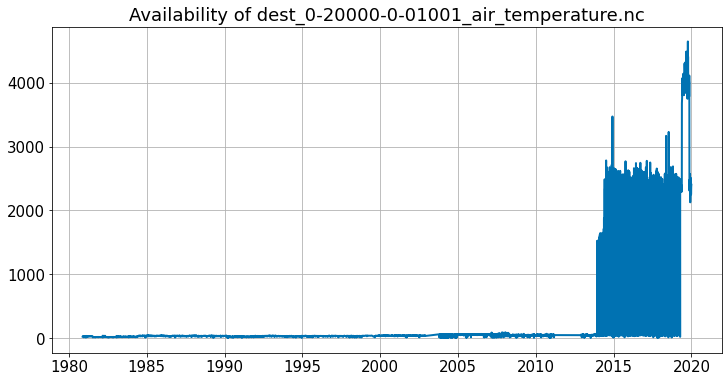

In [11]:
plot(fata.availability())
grid()
title('Availability of {}'.format(fata.name));

## Convert to Cube

In [8]:
fta = fata.read_data_to_cube('ta', dates=['2000-01-01','2019-01-01'])

2020-08-14 17:19:54,479 - upperair.cdm | make_datetime_slice - DEBUG - Datetime selection: 61980 - 1770842
2020-08-14 17:19:54,527 - upperair.cdm | read_variable - INFO - [READ] plev : [  1000   2000   3000   5000   7000  10000  15000  20000  25000  30000
  40000  50000  70000  85000  92500 100000] [Pa]
2020-08-14 17:19:54,577 - upperair.cdm | read_data_to_cube - INFO - [CUBE] ta (4916, 16)


<ipython-input-9-371c9d50556c>:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pcolormesh(fta['ta'].time,fta['ta'].plev,fta['ta'].T)


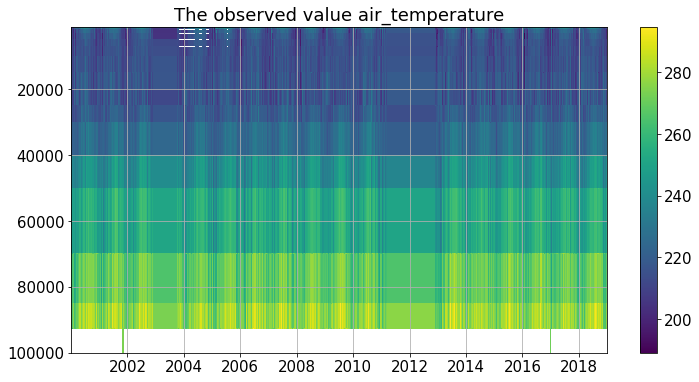

In [9]:
# plotting of Xarray is broken with matplotlib 3.3
# (fta['ta']).plot(y='plev')
pcolormesh(fta['ta'].time,fta['ta'].plev,fta['ta'].T)
ylim(100000,1000)
grid()
colorbar()
title('{description} {standard_name}'.format(**fata.read_attributes('ta')));

## Write to a frontend file

In [11]:
fata.write_variable('ta_std_plevs',cube=fta['ta'])

2020-08-14 17:20:00,252 - upperair.cdm | reopen - DEBUG - reopen dest_0-20000-0-01001_air_temperature.nc [r+]
2020-08-14 17:20:00,263 - upperair.cdm | make_datetime_slice - DEBUG - Datetime selection: 61980 - 1770842
2020-08-14 17:20:00,443 - upperair.cdm | write_variable - INFO - All dates found
2020-08-14 17:20:00,444 - upperair.cdm | write_variable - INFO - Creating Dataset ta_std_plevs ((66467,))
2020-08-14 17:20:00,513 - upperair.cdm | write_variable - INFO - Finsihed writing ta_std_plevs to dest_0-20000-0-01001_air_temperature.nc


In [12]:
fata

Filename: dest_0-20000-0-01001_air_temperature.nc
(G)roups/(V)ariables: 

 - V | lat__________________________________________ : : (2166471,)
 - V | lon__________________________________________ : : (2166471,)
 - V | obs__________________________________________ : : (2166471,)
 - V | plev_________________________________________ :L: (2166471,)
 - V | string14_____________________________________ : : (14,)
 - V | ta___________________________________________ : : (2166471,)
 - V | time_________________________________________ :L: (2166471,)
 - V | trajectory___________________________________ : : (7309,)
 - V | trajectory_index_____________________________ : : (2166471,)
 - V | trajectory_label_____________________________ : : (7309, 14)
 - V | ta_std_plevs_________________________________ :L: (2166471,)

In [9]:
sounding = fata.profile_to_dataframe('/',['ta','ta_std_plevs','plev','time'],'2015-01-02')
print(sounding[sounding['time']==3629163600])

2020-08-14 21:25:57,682 - upperair.cdm | make_datetime_slice - DEBUG - Datetime selection: 449232 - 451696
2020-08-14 21:25:57,683 - upperair.cdm | profile_to_dataframe - INFO - Reading Profile on slice(449232, 451696, None)
2020-08-14 21:25:57,684 - upperair.cdm | profile_to_dataframe - DEBUG - Read variables: dict_keys(['ta', 'ta_std_plevs', 'plev', 'time'])
            ta  ta_std_plevs     plev        time
0   226.449997           NaN    570.0  3629163600
1   225.649994           NaN    590.0  3629163600
2   223.649994           NaN    680.0  3629163600
3   215.149994           NaN    820.0  3629163600
4   217.449997           NaN    920.0  3629163600
5   209.050003           NaN   1730.0  3629163600
6   212.149994           NaN   2530.0  3629163600
7   208.649994           NaN   2860.0  3629163600
8   213.449997           NaN   4580.0  3629163600
9   211.149994           NaN   4920.0  3629163600
10  211.649994           NaN   5150.0  3629163600
11  214.750000           NaN   5890.0